### 导入运行程序

In [1]:
from ctmnet2.simulation import Simulator

### 仿真范围及路段编号

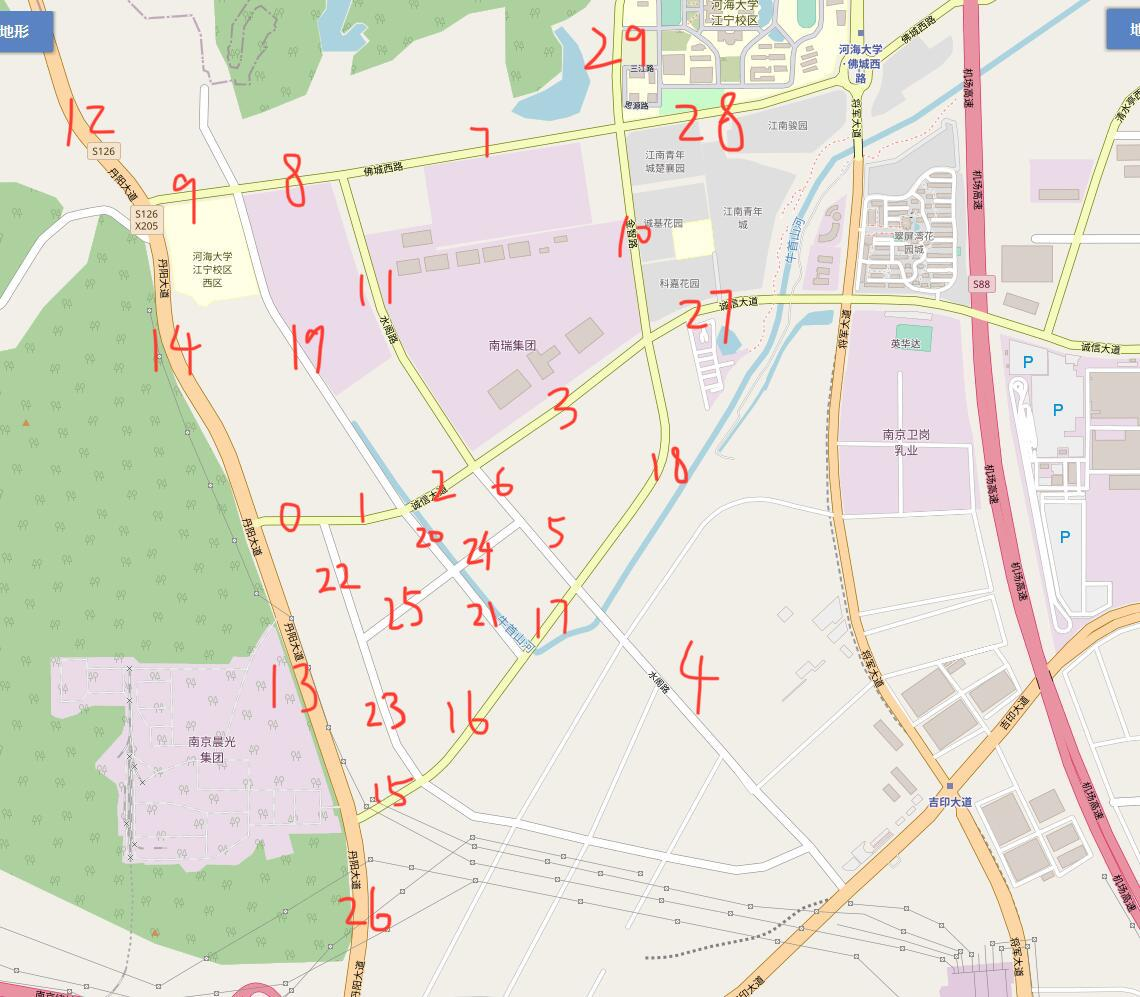

In [2]:
from IPython.display import Image
Image("NET.jpg")

### 设置输入输出的路段

In [3]:
U=[12,26,4,27,28,29]
D=[42,56,34,57,58,59]

### 建立路网、建立默认的信号灯、设置到达离去

In [4]:
from ctmnet2.networkcreation import create_from_xml

sim = create_from_xml("net1++.xml")
'''offset = 1
for sec_id in sim.sections.keys():
    sim.create('SignalController',sec_id,{'cycle': 135,'offset': offset})
    sim.create('Phase',sec_id,{'green_start': 0,'green_end': 30})
    sim.add_lamp(sec_id,sec_id,sec_id)
    offset=(offset+7)%30'''
for u in U:
    sim.set_arrival(str(u),1412*2)
for d in D:
    sim.set_departure(str(d),1600*2)

### 路灯检测数据输入

In [5]:
import xml.etree.ElementTree as ET
import re

sec_tree=ET.parse("sec_det.xml")
det_tree=ET.parse("detectors.xml")
secs=sec_tree.getroot()
dets=det_tree.getroot()
for sec in secs.iter('section'):
    sec_id=sec.attrib['id']
    det_id=re.findall(r"\d+",sec.find('detectors').text)
    #print(sec_id,det_id)
    n=0
    for i in det_id:
        for det in dets.iter('detector'):
            if det.attrib['id']==i:
                vol=float(det.find('volume').text)
                sim.sections[sec_id].cells[int(n)].volume=vol
                n=n+1

### 开始仿真

In [6]:
%%time

import numpy as np

result=[]
resultv=[]
r=[]
rv=[]
for i in range(500):
    r=[]
    rv=[]
    sim.run_single_step()
    V=sim.get_volume('cell')
    Vel=sim.get_velocity('cell')
    #S = sim.get_volume('section')
    '''if i<720 and i>690 and i%3==0:
        print(V['9'])
        print(V['10'])
        print(V['11'])'''
    '''if i>1500:
        for d in D:
            sim.set_departure(str(d),900)
    if i>1650:
        for d in D:
            sim.set_departure(str(d),1750*2)'''
    if i>=0 and i<500:
        for j in range(60):
            t=[]
            tv=[]
            for k in range(len(V[str(j)])):
                '''t.append(V[str(j)][k]+V[str(j+30)][len(V[str(j)])-k-1])
                tv.append(Vel[str(j)][k]+Vel[str(j+30)][len(Vel[str(j)])-k-1])'''
                t.append(V[str(j)][k])
                tv.append(Vel[str(j)][k])
            r=r+[round(i,1) for i in t]
            rv=rv+[round(i,1) for i in tv]
        result.append(r)
        resultv.append(rv)
#print(result)

Wall time: 11.3 s


In [7]:
Vel=sim.get_velocity('cell')
for V in Vel.values():
    VN=[str(v) for v in V]
    print(VN)

['60.0', '60.0', '60.0', '35.58', '9.5', '8.19']
['60.0', '60.0', '22.2', '3.24', '1.18', '1.58', '1.37']
['60.0', '60.0', '60.0', '7.35', '2.2', '1.91', '0.0']
['60', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '49.73', '7.6', '0.89', '0.53', '0.96', '1.28', '0.0']
['60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '57.79', '1.32', '1.07', '1.63', '1.41', '0.0']
['60', '60.0', '60.0', '60.0', '27.96', '7.82', '9.27']
['60.0', '60.0', '12.27', '2.47', '2.03', '0.0']
['60', '60', '60', '60', '60', '60', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '56.68', '10.83', '2.21', '1.74', '2.19', '0.0']
['60.0', '60.0', '60.0', '60.0', '60.0', '30.54', '5.77', '1.89', '0.0']
['60.0', '60.0', '60.0', '60.0', '60.0', '60.0', '7.66', '7.51']
['60', '60', '60', '60', '60', '60', '60', '60'

In [38]:
print(resultv)

[[38.3, 40.3, 40.3, 40.3, 40.3, 38.2, 37.4, 38.6, 40.3, 40.6, 40.3, 38.6, 37.4, 37.4, 38.6, 40.3, 40.6, 40.3, 38.6, 37.5, 38.9, 38.8, 38.0, 37.5, 37.4, 36.3, 35.7, 35.7, 35.7, 35.7, 35.7, 35.7, 36.3, 37.4, 37.5, 38.0, 38.8, 39.6, 38.1, 38.5, 38.8, 40.9, 40.6, 39.3, 38.2, 37.9, 35.7, 37.9, 37.7, 37.5, 36.5, 35.1, 34.4, 35.1, 36.5, 37.5, 37.7, 37.9, 35.7, 37.9, 38.2, 39.3, 40.6, 40.9, 38.8, 38.5, 48.2, 37.4, 38.6, 40.3, 40.6, 40.3, 38.6, 38.1, 38.2, 40.3, 40.3, 40.3, 40.3, 38.2, 39.7, 40.0, 37.9, 40.3, 40.1, 38.2, 36.7, 35.8, 35.1, 34.9, 35.6, 35.7, 35.6, 34.9, 35.1, 35.8, 36.7, 38.2, 40.1, 40.3, 37.9, 40.0, 39.6, 37.4, 37.9, 37.9, 38.9, 40.6, 38.9, 37.9, 37.9, 38.3, 37.5, 37.9, 38.6, 40.6, 40.6, 38.6, 37.9, 37.4, 39.4, 38.8, 38.0, 37.5, 37.4, 36.3, 35.7, 35.7, 35.7, 35.7, 35.7, 35.7, 36.3, 37.4, 37.5, 38.0, 38.8, 39.6, 40.7, 40.3, 40.7, 40.7, 40.3, 36.5, 37.9, 37.7, 37.5, 36.7, 35.8, 35.1, 34.8, 34.8, 35.1, 35.8, 36.7, 37.5, 37.7, 37.9, 36.5, 40.3, 40.7, 40.7, 40.3, 39.8, 49.9, 39.6, 38

### 查看每一个路段上的元胞数量

In [7]:
import numpy as np

sim.run_single_step()
V = sim.get_volume('cell')
n = 0
for j in range(30):
    n = n+len(V[str(j)])
    print(j,len(V[str(j)]),n)
    #t=np.array(V[str(j)])+np.array(V[str(j+30)])
    #print(t)

0 6 6
1 7 13
2 7 20
3 18 38
4 29 67
5 7 74
6 6 80
7 23 103
8 9 112
9 8 120
10 18 138
11 26 164
12 19 183
13 26 209
14 28 237
15 7 244
16 13 257
17 8 265
18 22 287
19 30 317
20 7 324
21 10 334
22 11 345
23 13 358
24 7 365
25 10 375
26 16 391
27 5 396
28 14 410
29 7 417


### 转置并查看元胞总数和总步长

In [8]:
T=[]
for i in range(len(result[0])):  # 行数
    t=[]
    for j in range(len(result)):
        t.append(result[j][i])
    T.append(t)
#print(T)
print(len(T),len(T[0]))

834 500


In [19]:
Tv=[]
for i in range(len(resultv[0])):  # 行数
    tv=[]
    for j in range(len(resultv)):
        tv.append(60-resultv[j][i])
    Tv.append(tv)
#print(Tv)
print(len(Tv),len(Tv[0]))

834 500


### 仿真结果写入文本

In [17]:
with open('4Netdata+++.txt','a') as file_handle:
    for t in T:
        file_handle.write(str(t)+',\n')

### 计算路网中各路段元胞间坐标的平均值

In [9]:
import xml.etree.ElementTree as ET
import re

tree = ET.parse("net1++.xml")
root = tree.getroot()
para = 'coordinates'
coordinates=[]
for sec in root.iter('section'):
    sec_id = sec.attrib['id']
    coors = re.findall(r"(\d+\.?\d*, \d+\.?\d*)",sec.find(para).text)
    COORS = []
    COOR = []
    COORDINATE = [0,0]
    COORDINATES = []
    for coor in coors:
        COOR = coor.split(',')
        COOR[0]=float(COOR[0])
        COOR[1]=float(COOR[1])
        COORS.append(COOR)
    #print(len(COORS))
    #print(COORS[6])
    for i in range(len(COORS)-1):
        COORDINATE[0] = (COORS[i][0]+COORS[i+1][0])/2
        COORDINATE[1] = (COORS[i][1]+COORS[i+1][1])/2
        COORDINATES.append(COORDINATE.copy())
    #print(COORDINATES)
    coordinates.extend(COORDINATES)
    #print(sec_id,len(COORDINATES))

### 元胞坐标写入文本

In [16]:
with open('Coordata.txt','a') as file_handle:
    for coor in coordinates:
        file_handle.write('{"lat":'+str(coor[0])+',"lng":'+str(coor[1])+'},\n')

### 路灯检测器数据文件

In [11]:
def det_refresh(t=0):
    with open("detectors.xml",'w') as file:
        file.write("<?xml version=\"1.0\" encoding=\"utf-8\"?>"+'\n')
        file.write("<detectors>"+'\n')
        #print(sim.sections)
        i=0
        for sec in sim.sections.values():
            j=0
            for cell in sec.cells:
                file.write('\t'+"<detector"+" id=\""+str(i)+"\">"+'\n')
                file.write('\t'+'\t'+"<volume>"+str(T[j][t])+"</volume>"+'\n')
                file.write('\t'+'\t'+"<coor>"+str(coordinates[i%len(coordinates)])+"</coor>"+'\n')
                file.write('\t'+"</detector>"+'\n')
                i=i+1
                j=j+1
        file.write("</detectors>"+'\n')

In [12]:
det_refresh(3)

In [21]:
def det_refresh_P(P=10):
    with open("detectors_30.xml",'w') as file:
        file.write("<?xml version=\"1.0\" encoding=\"utf-8\"?>"+'\n')
        file.write("<detectors>"+'\n')
        #print(sim.sections)
        i=0
        for sec in sim.sections.values():
            j=0
            for cell in sec.cells:
                file.write('\t'+"<detector"+" id=\""+str(i)+"\">"+'\n')
                file.write('\t'+'\t'+"<volume>")
                for k in range(P):
                    if k+1!=P:
                        file.write(str(T[j][-P+k])+', ')
                    else:
                        file.write(str(T[j][-P+k]))
                file.write("</volume>"+'\n')
                file.write('\t'+'\t'+"<coor>"+str(coordinates[i%len(coordinates)])+"</coor>"+'\n')
                file.write('\t'+"</detector>"+'\n')
                i=i+1
                j=j+1
        file.write("</detectors>"+'\n')

In [22]:
det_refresh_P(P=450)

### 路段上路灯检测器设置文件

In [86]:
with open("sec_det.xml",'w') as file:
    file.write("<?xml version=\"1.0\" encoding=\"utf-8\"?>"+'\n')
    file.write("<sections>"+'\n')
    n=0
    j=0
    for sec in sim.sections.values():
        file.write('\t'+"<section"+" id=\""+str(j)+"\">"+'\n')
        file.write('\t'+'\t'+"<detectors>")
        for cell in sec.cells:
            file.write(str(n)+' ')
            n=n+1
        file.write("</detectors>"+'\n')
        file.write('\t'+"</section>"+'\n')
        j=j+1
    file.write("</sections>"+'\n')

### 区域内道路总长

In [13]:
import xml.etree.ElementTree as ET
import re

tree = ET.parse("net1++.xml")
root = tree.getroot()
para = 'lanes_length'
S = 0
for sec in root.iter('section'):
    S += float(sec.find(para).text)
print(round(S,2))

40322.46


### 仿真后生成HTML文件

In [10]:
import webbrowser
from IPython.display import IFrame
with open("HMWT.html",'r',encoding='utf-8') as file:
    with open("HMWT+.html",'w',encoding='utf-8') as out:
        load=file.read()
        p1,pr=load.split("元胞坐标")
        out.write(p1+'\n')
        for coor in coordinates:
            out.write('{"lat":'+str(coor[0])+',"lng":'+str(coor[1])+'},\n')
        p2,pr=pr.split("元胞流量数据")
        out.write(p2+'\n')
        for t in T:
            out.write(str(t)+',\n')
        out.write(pr)

IFrame(src='HMWT+.html', width=600, height=600)

In [20]:
import webbrowser
from IPython.display import IFrame
with open("HMWT.html",'r',encoding='utf-8') as file:
    with open("HMWTv.html",'w',encoding='utf-8') as out:
        load=file.read()
        p1,pr=load.split("元胞坐标")
        out.write(p1+'\n')
        for coor in coordinates:
            out.write('{"lat":'+str(coor[0])+',"lng":'+str(coor[1])+'},\n')
        p2,pr=pr.split("元胞流量数据")
        out.write(p2+'\n')
        for tv in Tv:
            out.write(str(tv)+',\n')
        out.write(pr)

IFrame(src='HMWTv.html', width=600, height=600)

### TXT元胞数据输入显示为HTML文件

In [18]:
import webbrowser
from IPython.display import IFrame
with open("HMWT.html",'r',encoding='utf-8') as file:
    with open("HMWT++.html",'w',encoding='utf-8') as out:
        with open("4Netdata+++.txt",'r') as data:
            with open("Coordata.txt",'r') as coor:
                load=file.read()
                p1,pr=load.split("元胞坐标")
                out.write(p1+'\n')
                out.write(coor.read()+'\n')
                p2,pr=pr.split("元胞流量数据")
                out.write(p2+'\n')
                out.write(data.read()+'\n')
                out.write(pr)

IFrame(src='HMWT++.html', width=600, height=600)

### XML路灯检测数据刷新显示为HTML文件

In [23]:
import xml.etree.ElementTree as ET
import re
import webbrowser
from selenium import webdriver
import time

browser=webdriver.Chrome(executable_path ="D:\Python\chromedriver.exe")
browser.get("file:///C:/Users/87947/Desktop/iPython/OSMvisu/HMWT+++.html")
coors=""
with open("detectors.xml",'r') as data:
    det_tree=ET.parse("detectors.xml")
    dets=det_tree.getroot()
    for det in dets.iter('detector'):
        coor=(re.findall(r"(\d+\.?\d*, \d+\.?\d*)",det.find('coor').text))[0].split(', ')
        coors=coors+('{"lat":'+coor[0]+',"lng":'+coor[1]+'},\n')
for t in range(180):
    if t%3==0:
        det_refresh(t)
        det_tree=ET.parse("detectors.xml")
        dets=det_tree.getroot()
        with open("HMWT.html",'r',encoding='utf-8') as file:
            with open("HMWT+++.html",'w',encoding='utf-8') as out:
                load=file.read()
                p1,pr=load.split("元胞坐标")
                out.write(p1+'\n')
                out.write(coors+'\n')
                p2,pr=pr.split("元胞流量数据")
                out.write(p2+'\n')
                for det in dets.iter('detector'):
                    vol=det.find('volume').text
                    out.write('['+vol+']'+',\n')
                out.write(pr)
                browser.refresh()
                time.sleep(1)

In [24]:
import xml.etree.ElementTree as ET
import re
import webbrowser
from IPython.display import IFrame

coors=""
with open("detectors_30.xml",'r') as data:
    det_tree=ET.parse("detectors_30.xml")
    dets=det_tree.getroot()
    for det in dets.iter('detector'):
        coor=(re.findall(r"(\d+\.?\d*, \d+\.?\d*)",det.find('coor').text))[0].split(', ')
        coors=coors+('{"lat":'+coor[0]+',"lng":'+coor[1]+'},\n')

det_tree=ET.parse("detectors_30.xml")
dets=det_tree.getroot()
with open("HMWT.html",'r',encoding='utf-8') as file:
    with open("HMWT+++++.html",'w',encoding='utf-8') as out:
        load=file.read()
        p1,pr=load.split("元胞坐标")
        out.write(p1+'\n')
        out.write(coors+'\n')
        p2,pr=pr.split("元胞流量数据")
        out.write(p2+'\n')
        for det in dets.iter('detector'):
            vol=det.find('volume').text
            out.write('['+vol+']'+',\n')
        out.write(pr)
IFrame(src='HMWT+++++.html', width=600, height=600)